<a href="https://colab.research.google.com/github/ManojKumar-11/TRAVEL_AUTHENTICATION/blob/main/AITT_pbl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
from io import BytesIO

# Function to capture an image from the webcam
def take_photo(filename='captured_image.jpg'):
    # Ask the user to enter a key to capture the image
    input_key = input("Press 'c' when you are ready to capture the image: ")

    if input_key.lower() == 'c':  # Check if the entered key is 'c'
        js = Javascript('''
            async function takePhoto() {
                const video = document.createElement('video');
                const stream = await navigator.mediaDevices.getUserMedia({video: true});

                document.body.appendChild(video);
                video.srcObject = stream;
                await video.play();

                // Create a canvas to capture the image
                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;
                canvas.getContext('2d').drawImage(video, 0, 0);

                // Stop the video stream
                stream.getTracks().forEach(track => track.stop());
                video.remove();

                // Convert the canvas image to base64 and return
                return canvas.toDataURL('image/jpeg', 0.8);
            }
            takePhoto();
        ''')

        # Display the JavaScript to the user
        display(js)

        # Get the captured image data
        data = eval_js('takePhoto()')

        # Decode the base64 image and convert it into an OpenCV format image
        binary = b64decode(data.split(',')[1])
        image = np.array(Image.open(BytesIO(binary)))

        # Save the image using OpenCV
        cv2.imwrite(filename, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
        print(f"Image saved as {filename}")
    else:
        print("Image capture canceled. You can run the code again when you're ready.")

# Call the function to capture an image
take_photo('captured_image.jpg')

Press 'c' when you are ready to capture the image: c


<IPython.core.display.Javascript object>

Image saved as captured_image.jpg


In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=81bfcbddf024b413576ecd8bff5132b99c6fc182fb3c32872122a6774e3d18c1
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


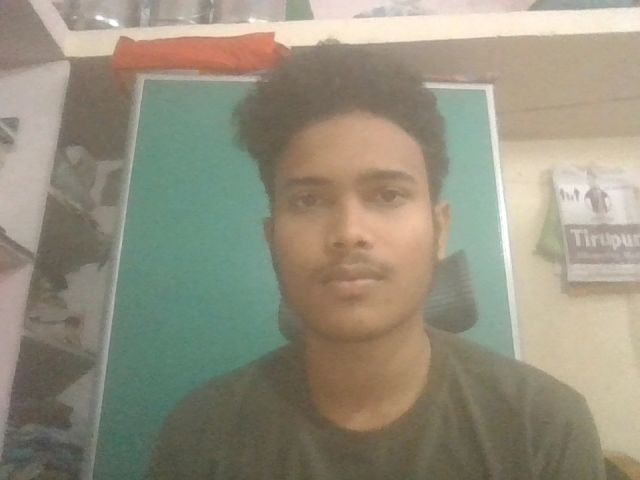

Name: Ray
Age: 25
Route: VZM - VSKP
Pass Expired on: 2024-10-11
Pass expired
NOT ELIGIBLE TO TRAVEL


In [ ]:
from deepface import DeepFace
import cv2
from google.colab.patches import cv2_imshow
from datetime import datetime

image_details = {
    "known_face1": ["Ray", 25, "VZM - VSKP", "2024-10-11"],
    "known_face2": ["Ben", 30, "SKML - VSKP", "2024-08-30"],
    "known_face3": ["Gwen",28, "VZM - SALUR", "2024-11-24"]
}

unknown_image = cv2.imread("captured_image.jpg")
if unknown_image is not None:
    cv2_imshow(unknown_image)
else:
    print("Error loading captured_image.jpg")
known_images = ["known_face1", "known_face2","known_face3"]
match_found = False


for known_image_name in known_images:
    known_image_path = f"{known_image_name}.jpg"
    known_image = cv2.imread(known_image_path)

    try:
        result = DeepFace.verify(unknown_image, known_image)

        if result['verified'] == True:
            details = image_details[known_image_name]
            name, age, route, pass_end_date = details
            current_date = datetime.now().date()
            expiration_date = datetime.strptime(pass_end_date, "%Y-%m-%d").date()
            if expiration_date >= current_date:
                print(f"Name: {name}, Age: {age}, Route: {route}, Pass Valid Until: {pass_end_date}")
                print("ELIGIBLE TO TRAVEL")
            else:
                print(f"Name: {name}\nAge: {age}\nRoute: {route}\nPass Expired on: {pass_end_date}")
                print("Pass expired\nNOT ELIGIBLE TO TRAVEL")

            match_found = True
            break
    except Exception as e:
        print(f"Error verifying with {known_image_path}: {e}")

if not match_found:
    print("No match found, not eligible to travel")